In [1]:
pip install japanize-matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import collections

In [49]:
df_summer = pd.read_excel(r"C:\Users\管理\Downloads\【鴨居】2024（夏） PREMIUM TEACHERS アンケート（回答）.xlsx")
df_winter = pd.read_excel(r"C:\Users\管理\Downloads\【鴨居】2024（冬） PREMIUM TEACHERS アンケート（回答）.xlsx")

In [50]:
print(df_summer.shape)
print(df_winter.shape)

(42, 19)
(45, 18)


In [51]:
print(df_summer.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Unnamed: 0                     42 non-null     int64         
 1   タイムスタンプ                        42 non-null     datetime64[ns]
 2   生徒さま氏名                         42 non-null     object        
 3   生徒さま学年                         42 non-null     object        
 4   １．一番元気に挨拶してくれている先生は誰ですか？       42 non-null     object        
 5   ２．一番話を聞いてくれている先生は誰ですか？         42 non-null     object        
 6   ３．一番面倒をみてくれていると思う先生は誰ですか？      42 non-null     object        
 7   ４．一番英語を教えてほしい先生は誰ですか？          42 non-null     object        
 8   理由                             30 non-null     object        
 9   ４．二番目に英語を教えてほしい先生は誰ですか？        42 non-null     object        
 10  理由.1                           29 non-null     object        
 11  ５．一番算数・数学・理科を教えてほしい先生

In [52]:
print(df_winter.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   タイムスタンプ                        45 non-null     datetime64[ns]
 1   生徒さま氏名                         45 non-null     object        
 2   生徒さま学年                         45 non-null     object        
 3   １．一番元気に挨拶してくれている先生は誰ですか？       45 non-null     object        
 4   ２．一番話を聞いてくれている先生は誰ですか？         45 non-null     object        
 5   ３．一番面倒をみてくれていると思う先生は誰ですか？      45 non-null     object        
 6   ４．一番英語を教えてほしい先生は誰ですか？          45 non-null     object        
 7   理由                             27 non-null     object        
 8   ４．二番目に英語を教えてほしい先生は誰ですか？        45 non-null     object        
 9   理由.1                           28 non-null     object        
 10  ５．一番算数・数学・理科を教えてほしい先生は誰ですか？    45 non-null     object        
 11  理由.2                 

In [53]:
df_summer = df_summer.fillna(0)
df_winter = df_winter.fillna(0)

In [55]:
print("夏の生徒様氏名",df_summer.iloc[:,2].unique())
print("冬の生徒様氏名",df_winter.iloc[:,1].unique())

夏の生徒様氏名 ['立之寧彩' '荒木翔太' '小出有己' '藤田福之亮' 'みずき' '伊藤翠咲' '吉野愛結' '村山七菜' '石坂琴音' '坂本希実'
 '金子真綾' '中島 優' '田中\u3000伸之' '宇佐美 星夏' '成田湊音' '村上真彦' '番場永守' 'りつの\u3000りょう'
 'りつのこう' '萱場莉子' '阿部泰治' '山本優真' '山永\u3000聖夏' '阿部悠人' '田邉晃史' 'まつしまりゅうせい'
 '石田孝士朗' '田邉結梨' '石井秀弥' '村上晴彦' '鈴木新太' '楠田誠一郎' '菊池遥' '一戸 悠真' '塩澤幸珠' '田中千裕'
 '村山琥之丞' '砂 雅斗' '濁川蒼生' '綿貫詩帆' '伊藤凛' '堤\u3000湖大']
冬の生徒様氏名 ['阿部泰治' '吉野愛結' '村山七菜' '小出有己' '萱場莉子' '田邉晃史' '田中伸之' '一戸悠真' '砂 雅斗' '濁川蒼生'
 '石坂琴音' '坂本\u3000希実' '池谷拓翔' '伊藤\u3000翠咲' '大竹悠斗' '浅水悠耶' '中島優' '田邉結梨' '鈴木新太'
 '石井秀弥' '山永\u3000聖夏' '藤田 福之亮' '村上真彦' '成田 湊音' '大羽\u3000佑弥' '伊藤凛' '宇佐美 星夏'
 '山本優真' '田中千裕' '立之遼' '村山琥之丞' '立之こう' '荒木\u3000翔太' '堤\u3000湖大' '石田\u3000孝士朗'
 '井出悠斗' '大橋' '林実穂' '阿部悠人' '常念蒼右' '楠田誠一郎' '番場\u3000永守' '村上晴彦' '須藤彬']


In [56]:
df_summer.iloc[:, 2] = df_summer.iloc[:, 2].str.replace("\u3000", "", regex=True)
df_winter.iloc[:, 1] = df_winter.iloc[:, 1].str.replace("\u3000", "", regex=True)

print("夏の生徒様氏名", df_summer.iloc[:, 2].unique())
print("冬の生徒様氏名", df_winter.iloc[:, 1].unique())


夏の生徒様氏名 ['立之寧彩' '荒木翔太' '小出有己' '藤田福之亮' 'みずき' '伊藤翠咲' '吉野愛結' '村山七菜' '石坂琴音' '坂本希実'
 '金子真綾' '中島 優' '田中伸之' '宇佐美 星夏' '成田湊音' '村上真彦' '番場永守' 'りつのりょう' 'りつのこう'
 '萱場莉子' '阿部泰治' '山本優真' '山永聖夏' '阿部悠人' '田邉晃史' 'まつしまりゅうせい' '石田孝士朗' '田邉結梨'
 '石井秀弥' '村上晴彦' '鈴木新太' '楠田誠一郎' '菊池遥' '一戸 悠真' '塩澤幸珠' '田中千裕' '村山琥之丞' '砂 雅斗'
 '濁川蒼生' '綿貫詩帆' '伊藤凛' '堤湖大']
冬の生徒様氏名 ['阿部泰治' '吉野愛結' '村山七菜' '小出有己' '萱場莉子' '田邉晃史' '田中伸之' '一戸悠真' '砂 雅斗' '濁川蒼生'
 '石坂琴音' '坂本希実' '池谷拓翔' '伊藤翠咲' '大竹悠斗' '浅水悠耶' '中島優' '田邉結梨' '鈴木新太' '石井秀弥'
 '山永聖夏' '藤田 福之亮' '村上真彦' '成田 湊音' '大羽佑弥' '伊藤凛' '宇佐美 星夏' '山本優真' '田中千裕' '立之遼'
 '村山琥之丞' '立之こう' '荒木翔太' '堤湖大' '石田孝士朗' '井出悠斗' '大橋' '林実穂' '阿部悠人' '常念蒼右'
 '楠田誠一郎' '番場永守' '村上晴彦' '須藤彬']


In [70]:
print("夏の一番元気に挨拶してくれている先生は誰ですか？のユニークを確認",df_summer.iloc[:,4].unique())
print("冬の一番元気に挨拶してくれている先生は誰ですか？のユニークを確認",df_winter.iloc[:,3].unique())

夏の一番元気に挨拶してくれている先生は誰ですか？のユニークを確認 ['鈴木 啓太' '斉藤 佑弥' '見澤 優貴' '松岡 海音' '白石 陽大']
冬の一番元気に挨拶してくれている先生は誰ですか？のユニークを確認 ['斉藤 佑弥' '石原 聖奈' '鈴木 啓太' '松岡 海音' '後藤 駿介']


In [73]:
print("夏の一番元気に挨拶してくれている先生は誰ですか？を数える",collections.Counter(df_summer.iloc[:,4]))
print("冬の一番元気に挨拶してくれている先生は誰ですか？を数える",collections.Counter(df_winter.iloc[:,3]))
print("夏の一番話を聞いてくれている先生は誰ですか？を数える",collections.Counter(df_summer.iloc[:,5]))
print("冬の一番話を聞いてくれている先生は誰ですか？を数える",collections.Counter(df_winter.iloc[:,4]))
print("夏の一番面倒をみてくれていると思う先生は誰ですか？を数える",collections.Counter(df_summer.iloc[:,6]))
print("冬の一番面倒をみてくれていると思う先生は誰ですか？を数える",collections.Counter(df_winter.iloc[:,5]))
print("夏の一番英語を教えてほしい先生は誰ですか？を数える",collections.Counter(df_summer.iloc[:,7]))
print("冬の一番英語を教えてほしい先生は誰ですか？を数える",collections.Counter(df_winter.iloc[:,6]))
print("夏の二番目に英語を教えてほしい先生は誰ですか？を数える",collections.Counter(df_summer.iloc[:,9]))
print("冬の二番目に英語を教えてほしい先生は誰ですか？を数える",collections.Counter(df_winter.iloc[:,8]))
print("夏の一番算数・数学・理科を教えてほしい先生は誰ですか？を数える",collections.Counter(df_summer.iloc[:,11]))
print("冬の一番算数・数学・理科を教えてほしい先生は誰ですか？を数える",collections.Counter(df_winter.iloc[:,10]))
print("夏の二番目に算数・数学・理科を教えてほしい先生は誰ですか？を数える",collections.Counter(df_summer.iloc[:,13]))
print("冬の二番目に算数・数学・理科を教えてほしい先生は誰ですか？を数える",collections.Counter(df_winter.iloc[:,12]))
print("夏の一番国語・社会を教えてほしい先生は誰ですか？を数える",collections.Counter(df_summer.iloc[:,15]))
print("冬の一番国語・社会を教えてほしい先生は誰ですか？を数える",collections.Counter(df_winter.iloc[:,14]))
print("夏の二番国語・社会を教えてほしい先生は誰ですか？を数える",collections.Counter(df_summer.iloc[:,17]))
print("冬の二番国語・社会を教えてほしい先生は誰ですか？を数える",collections.Counter(df_winter.iloc[:,16]))

夏の一番元気に挨拶してくれている先生は誰ですか？を数える Counter({'鈴木 啓太': 26, '斉藤 佑弥': 12, '見澤 優貴': 2, '松岡 海音': 1, '白石 陽大': 1})
冬の一番元気に挨拶してくれている先生は誰ですか？を数える Counter({'斉藤 佑弥': 21, '鈴木 啓太': 21, '石原 聖奈': 1, '松岡 海音': 1, '後藤 駿介': 1})
夏の一番話を聞いてくれている先生は誰ですか？を数える Counter({'鈴木 啓太': 10, '斉藤 佑弥': 10, '永礼 もも香': 7, '白石 陽大': 6, '松岡 海音': 4, '見澤 優貴': 2, '石原 聖奈': 1, '関野 優一郎': 1, '大堀 愛実': 1})
冬の一番話を聞いてくれている先生は誰ですか？を数える Counter({'鈴木 啓太': 12, '斉藤 佑弥': 11, '松岡 海音': 8, '白石 陽大': 6, '石原 聖奈': 4, '刈山 蔵之介': 3, '後藤 駿介': 1})
夏の一番面倒をみてくれていると思う先生は誰ですか？を数える Counter({'鈴木 啓太': 16, '斉藤 佑弥': 9, '見澤 優貴': 6, '永礼 もも香': 4, '松岡 海音': 2, '白石 陽大': 2, '石原 聖奈': 1, '刈山 蔵之介': 1, '後藤 駿介': 1})
冬の一番面倒をみてくれていると思う先生は誰ですか？を数える Counter({'鈴木 啓太': 19, '斉藤 佑弥': 14, '松岡 海音': 8, '石原 聖奈': 3, '後藤 駿介': 1})
夏の一番英語を教えてほしい先生は誰ですか？を数える Counter({'見澤 優貴': 16, '永礼 もも香': 7, '白石 陽大': 6, '鈴木 啓太': 6, '斉藤 佑弥': 6, '刈山 蔵之介': 1})
冬の一番英語を教えてほしい先生は誰ですか？を数える Counter({'白石 陽大': 16, '鈴木 啓太': 12, '斉藤 佑弥': 10, '松岡 海音': 4, '刈山 蔵之介': 2, '石原 聖奈': 1})
夏の二番目に英語を教えてほしい先生は誰ですか？を数える Counter({'鈴木 啓太': 11,

In [68]:
df_summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Unnamed: 0                     42 non-null     int64         
 1   タイムスタンプ                        42 non-null     datetime64[ns]
 2   生徒さま氏名                         42 non-null     object        
 3   生徒さま学年                         42 non-null     object        
 4   １．一番元気に挨拶してくれている先生は誰ですか？       42 non-null     object        
 5   ２．一番話を聞いてくれている先生は誰ですか？         42 non-null     object        
 6   ３．一番面倒をみてくれていると思う先生は誰ですか？      42 non-null     object        
 7   ４．一番英語を教えてほしい先生は誰ですか？          42 non-null     object        
 8   理由                             42 non-null     object        
 9   ４．二番目に英語を教えてほしい先生は誰ですか？        42 non-null     object        
 10  理由.1                           42 non-null     object        
 11  ５．一番算数・数学・理科を教えてほしい先生

In [69]:
df_winter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   タイムスタンプ                        45 non-null     datetime64[ns]
 1   生徒さま氏名                         45 non-null     object        
 2   生徒さま学年                         45 non-null     object        
 3   １．一番元気に挨拶してくれている先生は誰ですか？       45 non-null     object        
 4   ２．一番話を聞いてくれている先生は誰ですか？         45 non-null     object        
 5   ３．一番面倒をみてくれていると思う先生は誰ですか？      45 non-null     object        
 6   ４．一番英語を教えてほしい先生は誰ですか？          45 non-null     object        
 7   理由                             45 non-null     object        
 8   ４．二番目に英語を教えてほしい先生は誰ですか？        45 non-null     object        
 9   理由.1                           45 non-null     object        
 10  ５．一番算数・数学・理科を教えてほしい先生は誰ですか？    45 non-null     object        
 11  理由.2                 

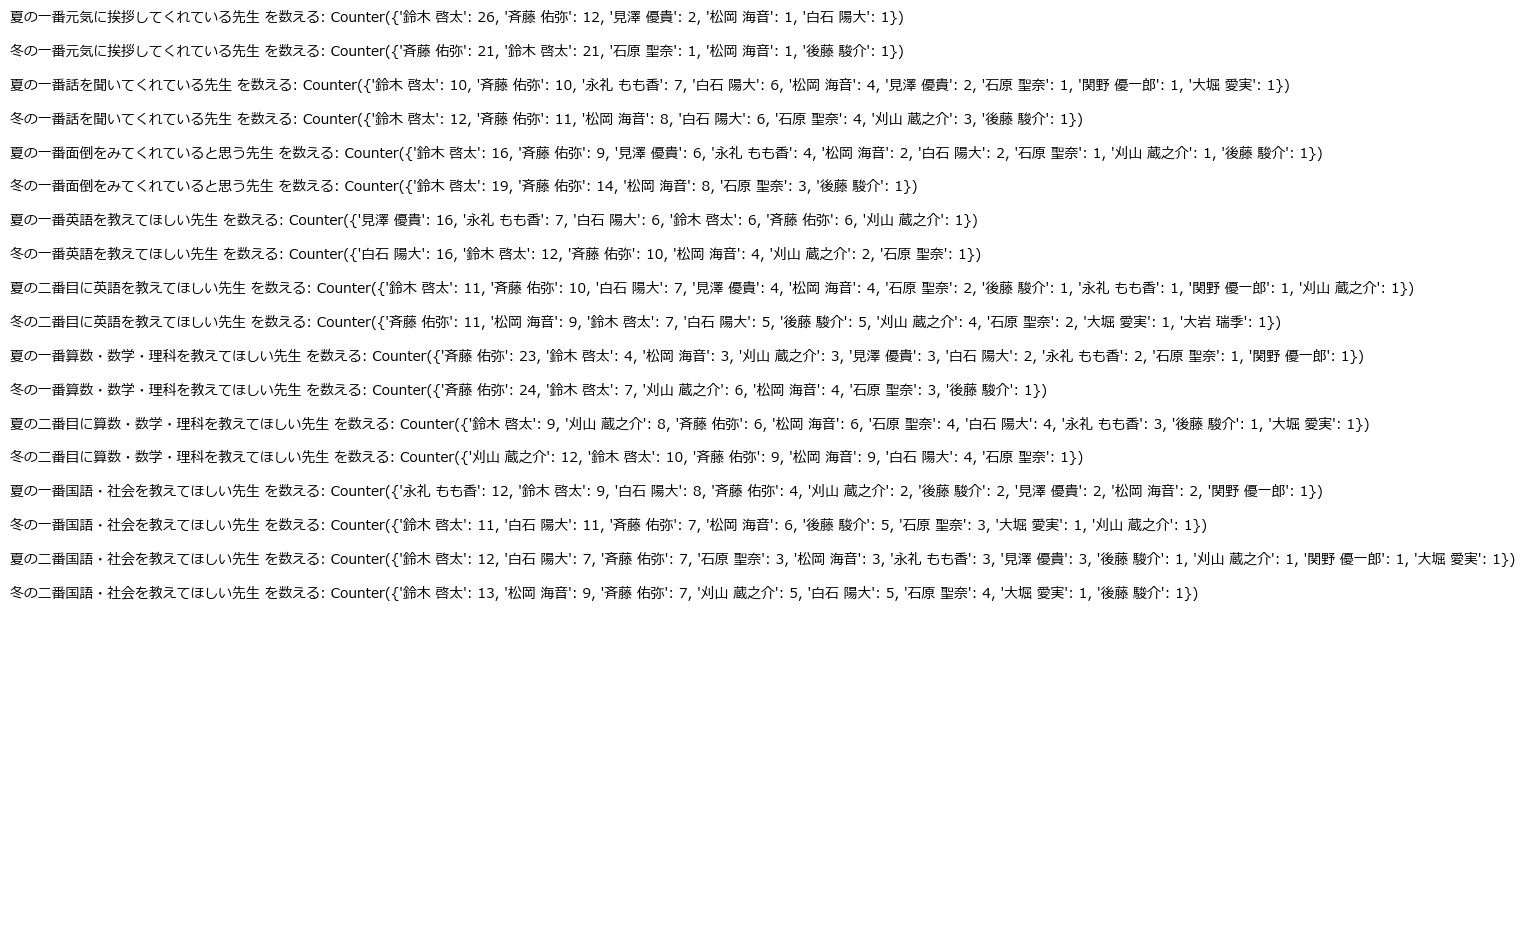

In [76]:
import collections
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import matplotlib

# 日本語フォントの設定
matplotlib.rcParams['font.family'] = 'Meiryo'  # Windows用
# matplotlib.rcParams['font.family'] = 'MS Gothic'  # Meiryoでうまくいかない場合の代替

# 質問リスト
questions = [
    ("夏の一番元気に挨拶してくれている先生", df_summer.iloc[:, 4]),
    ("冬の一番元気に挨拶してくれている先生", df_winter.iloc[:, 3]),
    ("夏の一番話を聞いてくれている先生", df_summer.iloc[:, 5]),
    ("冬の一番話を聞いてくれている先生", df_winter.iloc[:, 4]),
    ("夏の一番面倒をみてくれていると思う先生", df_summer.iloc[:, 6]),
    ("冬の一番面倒をみてくれていると思う先生", df_winter.iloc[:, 5]),
    ("夏の一番英語を教えてほしい先生", df_summer.iloc[:, 7]),
    ("冬の一番英語を教えてほしい先生", df_winter.iloc[:, 6]),
    ("夏の二番目に英語を教えてほしい先生", df_summer.iloc[:, 9]),
    ("冬の二番目に英語を教えてほしい先生", df_winter.iloc[:, 8]),
    ("夏の一番算数・数学・理科を教えてほしい先生", df_summer.iloc[:, 11]),
    ("冬の一番算数・数学・理科を教えてほしい先生", df_winter.iloc[:, 10]),
    ("夏の二番目に算数・数学・理科を教えてほしい先生", df_summer.iloc[:, 13]),
    ("冬の二番目に算数・数学・理科を教えてほしい先生", df_winter.iloc[:, 12]),
    ("夏の一番国語・社会を教えてほしい先生", df_summer.iloc[:, 15]),
    ("冬の一番国語・社会を教えてほしい先生", df_winter.iloc[:, 14]),
    ("夏の二番国語・社会を教えてほしい先生", df_summer.iloc[:, 17]),
    ("冬の二番国語・社会を教えてほしい先生", df_winter.iloc[:, 16]),
]

# 出力結果を保存するリスト
results = []
for question, data in questions:
    count_result = collections.Counter(data)
    results.append(f"{question} を数える: {count_result}\n")

# 画像として保存
fig, ax = plt.subplots(figsize=(10, 12))
ax.text(0, 1, "\n".join(results), fontsize=10, va="top", family="Meiryo")
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)
plt.savefig(r"C:\Users\管理\Desktop\得票数の各々の結果.png", dpi=300, bbox_inches="tight")
plt.show()


In [87]:
suzuki = 26 + 21 + 10 + 12 + 16 + 19 + 6 + 12 + 11 + 7 + 4 + 7 + 9 + 10 + 9 + 11 + 12 + 13
saito = 12 + 21 + 10 + 11 + 9 + 14 + 6 + 10 + 10 + 11 + 23 + 24 + 6 + 9 + 4 + 7 + 7 + 7
matuoka = 1 + 1 + 4 + 8 + 2 + 8 + 4 + 4 + 9 + 3 + 4 + 6 + 9 + 2 + 6 + 3 + 9

print("鈴木啓太の得票数",suzuki)
print("斉藤 佑弥の総得票数" , saito)
print("松岡 海音の総得票数",matuoka)

鈴木啓太の得票数 215
斉藤 佑弥の総得票数 201
松岡 海音の総得票数 83
